In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [ ]:
path ='/content/drive/MyDrive/Colab Notebooks/creditcard.csv'
data=pd.read_csv(path)

#Understanding the Data
**bold text**# Grab a peek at the data

In [ ]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Describing the Data
 
 Print the shape of the data
 
 data = data.sample(frac = 0.1, random_state = 48)

In [ ]:
data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())

(597, 31)
              Time          V1          V2          V3          V4  \
count   597.000000  597.000000  597.000000  597.000000  597.000000   
mean   2623.192630   -0.386576    0.248204    0.870627    0.051305   
std    1772.471763    1.487889    1.486891    1.110279    1.415449   
min      15.000000   -8.733429  -12.114213   -5.694973   -3.421195   
25%    1066.000000   -1.054584   -0.317883    0.365195   -0.918709   
50%    2501.000000   -0.483779    0.413475    0.948166    0.097719   
75%    3768.000000    1.075184    1.015111    1.621854    1.032416   
max    6606.000000    1.571567    6.228861    3.614409    4.143350   

               V5          V6          V7          V8          V9  ...  \
count  597.000000  597.000000  597.000000  597.000000  597.000000  ...   
mean     0.029997    0.181490    0.010650   -0.008638    0.404740  ...   
std      1.294328    1.388810    1.157591    1.198551    1.130326  ...   
min    -11.416881   -5.939790  -10.045540  -22.746370   -2.7743

#Imbalance in the data
#Time to explain the data we are dealing with
# Determine number of fraud cases in dataset

In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.0
Fraud Cases: 0
Valid Transactions: 597


#Print the amount details for Fraudulent Transaction

In [ ]:
#print(“Amount details of the fraudulent transaction”)
fraud.Amount.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Amount, dtype: float64

#Print the amount details for Normal Transaction

In [ ]:
#print(“details of valid transaction”)
valid.Amount.describe()

count     597.000000
mean       71.054489
std       232.077714
min         0.000000
25%         4.630000
50%        19.690000
75%        61.580000
max      3828.040000
Name: Amount, dtype: float64

#Plotting the Correlation Matrix
# Correlation matrix

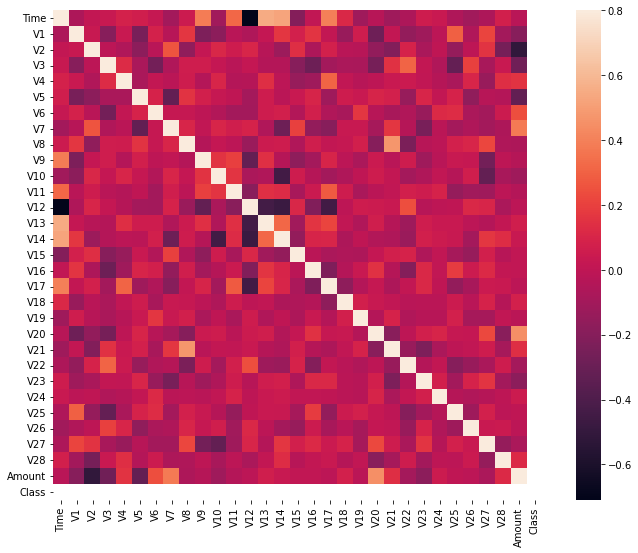

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

#Separating the X and the Y values
# dividing the X and the Y from the dataset

In [ ]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData= X.values
yData = Y.values

(597, 30)
(597,)


Training and Testing Data Bifurcation
We will be dividing the dataset into two main groups. One for training the model and the other for Testing our trained model’s performance.

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
		xData, yData, test_size = 0.2, random_state = 42)


Code : Building a Random Forest Model using skicit learn

In [ ]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)


 Evaluating the classifier
 
 printing every score of the classifier
 
 scoring in anything



In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [ ]:
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
#print("The model used is Random Forest classifier")


In [ ]:
acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The accuracy is 1.0
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
